In [14]:
# imports
import numpy as np
import pandas as pd
import json
import requests
import os
import sys
from pathlib import Path
from operator import itemgetter

from covid_package.libs.store_data import read_data
from covid_package.libs.valid_keys import fetch_l0_keys, fetch_l1_keys, fetch_l2_keys
from covid_package.libs.aggregate_data import fetch_latest_data_date, fetch_date_list
from covid_package.api.get_country_records import get_country_records
from covid_package.libs.country_list import fetch_countries
from covid_package.api.get_country_data import get_level_1_data, get_l2_keys_data, get_l2_date_data
from covid_package.api.get_case_death_data import get_case_death_mean_std
from covid_package.plots.plot_results import subplot_share_axis

In [15]:
# set up data file path
CURRENT_DIR = os.path.abspath('')
sys.path.append(CURRENT_DIR)

FILE_NAME = 'owid-covid-data.json'
file_path = os.path.join(CURRENT_DIR, 'data', FILE_NAME)
DATA_FILE = Path(file_path)

# read the data file from the data dir
data = read_data(DATA_FILE)

In [16]:
# populate the keys
key_list = fetch_l0_keys(data)
#country_list = fetch_countries(data)
print("Latest data is:", fetch_latest_data_date(data, key_list))

Latest data is: 2021-02-28


In [17]:
# list of valid level 1 keys
#print(fetch_l1_keys(data, key_list))

In [18]:
# list of valid level 2 keys
#print(fetch_l2_keys(data, key_list))

In [19]:
# for each country, get record numbers and data dates
#print(get_country_records(data, key_list))

In [20]:
# get an exhaustive list of dates in the data

date_list = fetch_date_list(data, key_list)

#print("Number of distinct dates = ", len(date_list))

In [21]:
# calculate cases and deaths per day per million population

res = ['new_cases_per_million', 'new_deaths_per_million']

# get the data from those resources

get_data = get_l2_keys_data(data, key_list, res)

#for day in range(len(get_data['AFG'])):
#    print(get_data['AFG'][day])


In [22]:
# get a dictionary of tuples containing data for all countries reporting:
# mean cases, standard deviation of cases, mean deaths, standard deviation of deaths
# one for each date in the dataset

dates_obj = get_case_death_mean_std(data, key_list, date_list)

#print(dates_obj) 

In [23]:
# calculate the max values for the graph y indices

sort_y_cases = sorted(dates_obj.values(), key=itemgetter(0), reverse=True)
sort_y_deaths = sorted(dates_obj.values(), key=itemgetter(2), reverse=True)

max_y_cases = sort_y_cases[0][0]
max_y_deaths = sort_y_deaths[0][2]

print(max_y_cases)
print(max_y_deaths)

175.50722222222223
3.7271142857142863


No handles with labels found to put in legend.


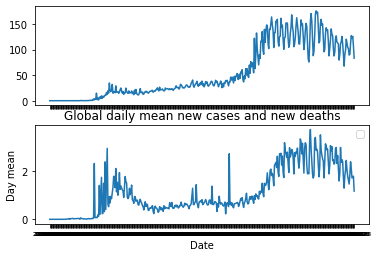

In [24]:
# package up the matplotlib data

# create the labels
labels_obj = {}
labels_obj['chart_title'] = "Global daily mean new cases and new deaths"
labels_obj['x_axis_label'] = "Date"
labels_obj['y_axis_label'] = "Day mean"
labels_obj['legend_1'] = "New cases"
labels_obj['legend_2'] = "New deaths"


# reorganize the results
results_obj = {}
x_axis = []
y1_mean = []
y2_mean = []
#y1_std = []
#y2_std = []

for key, value in dates_obj.items():
    x_axis.append(key)
    y1_mean.append(value[0])
    #y1_std.append(value[1])
    y2_mean.append(value[2])
    #y2_std.append(value[3])

results_obj['x_axis'] = x_axis
results_obj['y1_axis'] = y1_mean
#results_ojb['y1_std'] = y1_std
results_obj['y2_axis'] = y2_mean
#results_ojb['y2_std'] = y2_std

#print(results[2])

# call matplotlib driver function
subplot_share_axis(labels_obj, results_obj)